# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear regression in one dimension

In [41]:
import numpy as np

X = 2 * np.random.rand(100, 1)    # 100 x 1 random values from 0 to 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 3x + 4 + (normal) noise

# X_test = 2 * np.random.rand(20, 1)    # 100 x 1 random values from 0 to 2
# y_test = 4 + 3 * X + np.random.randn(20, 1)  # y = 3x + 4 + (normal) noise

print(X.shape, y.shape)

(100, 1) (100, 1)


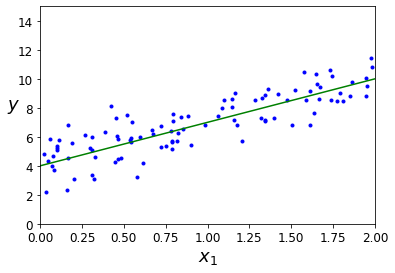

In [40]:
plt.plot(X, y, "b.")    # replacement for scatter()
X_true = np.asarray([[0], [2]])
Y_true = 4 + 3*X_true
plt.plot(X_true, Y_true, "g-")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()   # Construct a model
lin_reg.fit(X, y)              # Fit the model to the data
lin_reg.intercept_, lin_reg.coef_   # now these are defined (!)

(array([3.70432478]), array([[3.28906637]]))

In [43]:
X_endpoints = np.asarray([[0], [2]])
y_endpoints = lin_reg.predict(X_endpoints)   # Use model to predict values for endpoints
y_endpoints

array([[ 3.70432478],
       [10.28245752]])

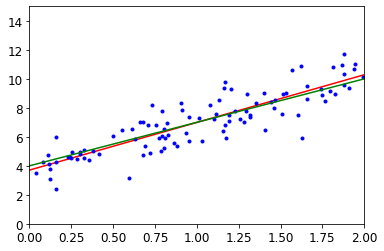

In [44]:
plt.plot(X_endpoints, y_endpoints, "r-")  # red line (-) between two points
plt.plot(X, y, "b.")    # blue scatter plot (use .)
plt.plot(X_true, Y_true, "g-")
plt.axis([0, 2, 0, 15]) # for comparison
plt.show()

In [ ]:
# Linear regression in more than one dimension

In [51]:
X2 = 2 * np.random.rand(100, 2)    # 100 x 2 random values from 0 to 2
y2 = 2 + 3 * X2[:,0] + 5 * X2[:,1] + np.random.randn(100,)  # y = 2+ 3x1 + 5x2 + (normal) noise
y2 = y2.reshape((-1, 1))
print(X2.shape, y2.shape)


(100, 2) (100, 1)


In [53]:
lin_reg2 = LinearRegression()   # Construct a model
lin_reg2.fit(X2, y2)              # Fit the model to the data
lin_reg2.intercept_, lin_reg2.coef_   # now these are defined (!)

(array([1.84780278]), array([[2.92957315, 5.06974454]]))

# Polynomial regression

In [16]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [54]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


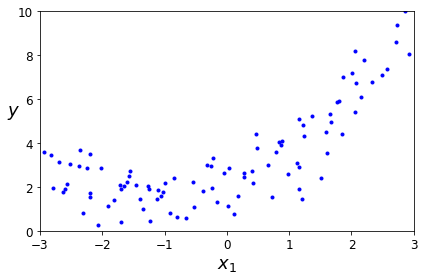

In [55]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.73418066])

In [57]:
X_poly[0]

array([-1.73418066,  3.00738255])

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99653192]), array([[1.05863985, 0.48956558]]))

Saving figure quadratic_predictions_plot


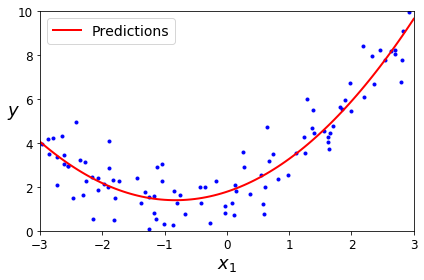

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Saving figure high_degree_polynomials_plot


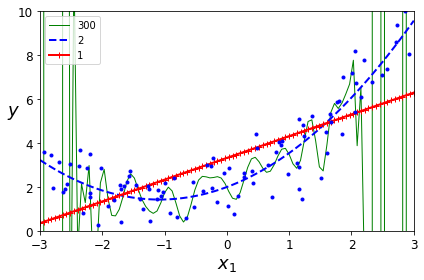

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()